In [114]:
#引入需要的工具包
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
#加载数据与分析数据
df = pd.read_csv('data.csv')
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [76]:
df.shape

(569, 32)

In [77]:
df.info()
#可以发现没有缺失值，id作为标识，在数据分析中没有意义，直接去掉
df.drop('id',axis=1,inplace=True)
print('已去除id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [78]:
df.diagnosis.value_counts()
#diagnosis作为分类结果，可以映射为数字

B    357
M    212
Name: diagnosis, dtype: int64

In [80]:
df.diagnosis = df.diagnosis.map({'B':0,'M':1})
df.head(1)

In [86]:
# 将特征字段分成3组
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:21])
features_worst=list(df.columns[21:31])

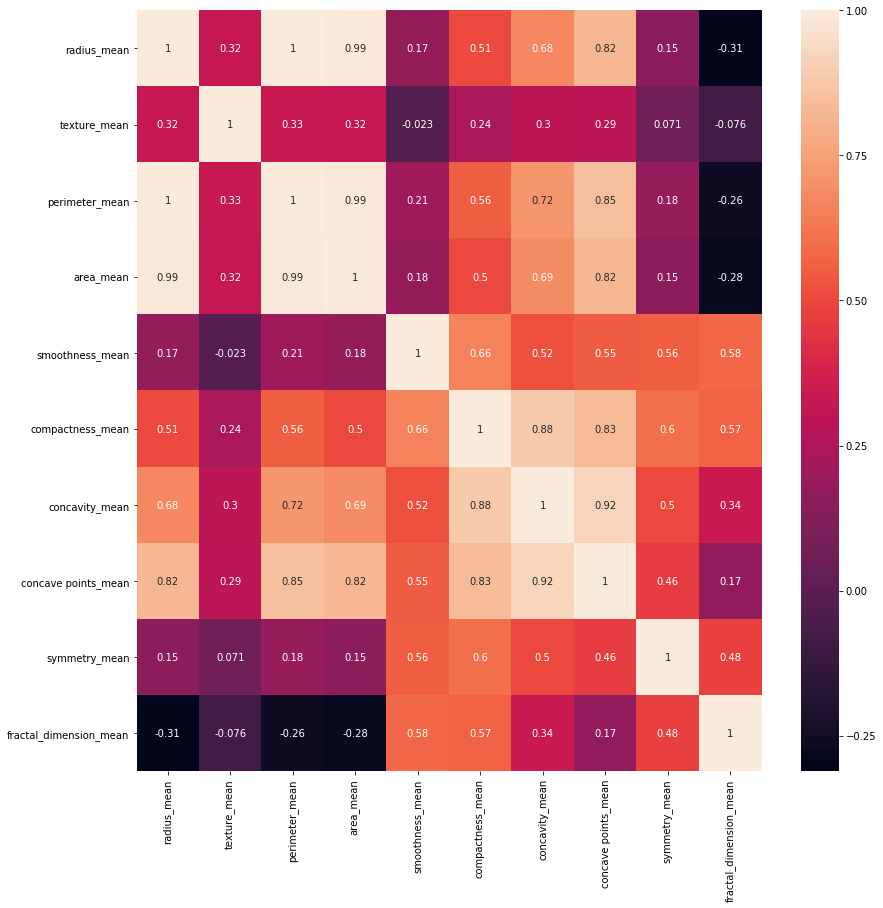

In [92]:
# 用热力图呈现features_mean字段之间的相关性
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                      NaN          NaN           NaN             NaN   
radius_mean                    NaN          NaN           NaN        0.997855   
texture_mean                   NaN          NaN           NaN             NaN   
perimeter_mean                 NaN     0.997855           NaN             NaN   
area_mean                      NaN     0.987357           NaN        0.986507   
smoothness_mean                NaN          NaN           NaN             NaN   
compactness_mean               NaN          NaN           NaN             NaN   
concavity_mean                 NaN          NaN           NaN             NaN   
concave points_mean            NaN          NaN           NaN             NaN   
symmetry_mean                  NaN          NaN           NaN             NaN   
fractal_dimension_mean         NaN          NaN           NaN             NaN   
radius_se                   

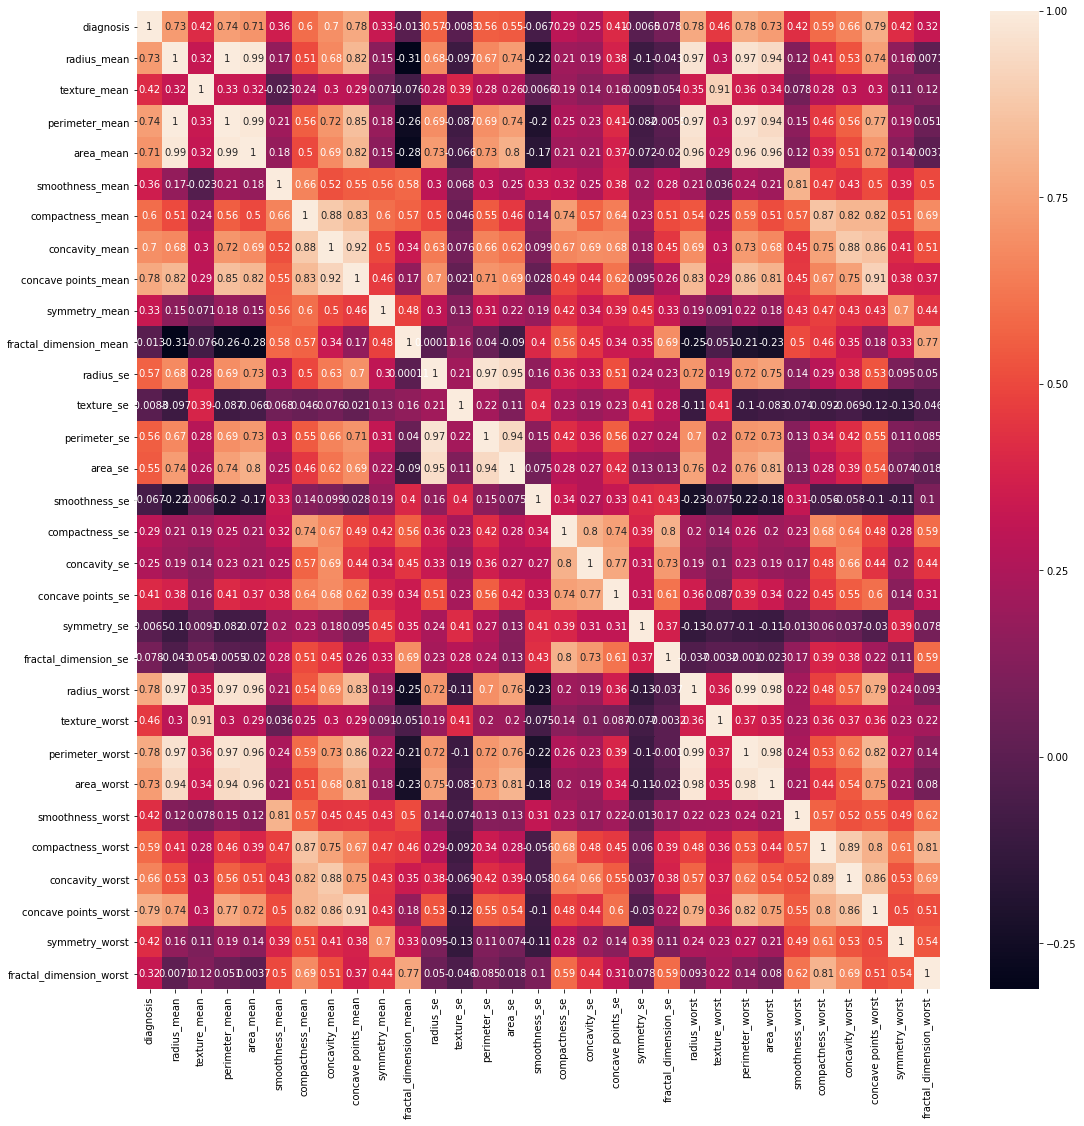

In [100]:
# 用热力图呈现features_mean字段之间的相关性
corr = df.corr()
print(corr[(corr>0.95) & (corr < 1)])
plt.figure(figsize=(18,18))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [103]:
from sklearn import decomposition

In [107]:
label = df.diagnosis
X = df.iloc[:,1:]

In [140]:
#看图可知perimeter_mean、radius_mean、以及area_mean的相关性高达0.99，可挑选一个特征即可，使用PCA进行降维
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)


[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 3.68048171e-06 2.84790425e-06
 2.00491564e-06 7.01997261e-07]


In [170]:
pca.n_components = 11
X_reduced = pca.fit_transform(X)

In [171]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced.head()
#X_reduced['label'] = label


,0,1,2,3,4,5,6,7,8,9,10
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228


In [174]:
# 抽取30%的数据作为测试集，其余作为训练集
train, test,train_label,test_label = train_test_split(X_reduced,label, test_size = 0.3)

In [178]:
ss = StandardScaler()
train_X = ss.fit_transform(train)
test_X = ss.transform(test)

In [181]:
# 创建SVM分类器
model = sklearn.svm.SVC()
# 用训练集做训练
model.fit(train_X,train_label)
# 用测试集做预测
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(prediction,test_label))

准确率:  0.9590643274853801
